In [1]:
# Importing required Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Creating path for easier Access:

path = r'C:\Users\Lenovo\Desktop\Career Foundry\28-06-2024 Instacart Basket Analysis - Saswata Biswas'

In [5]:
# Importing the latest file
ords_prods_cust_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_merged.pkl'))


In [7]:
# No one will understand scientific numbers. Changing the display setting:
pd.set_option('display.float_format', lambda x: '%.2f' % x)


### Q02. Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

### 

I would ask my Supervisor/senior colleague and remove the first_name and surname columns. As of now I am leaving them as they are as they are just fabricated samples.

### Q03. The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.

In [12]:
# Checking to see which row has the names of the cities:
ords_prods_cust_merge.dtypes

order_id                     int32
user_id                      int32
order_number                  int8
orders_days_of_week           int8
order_hour_of_day             int8
days_since_prior_order     float16
product_id                   int32
add_to_cart_order            int16
reordered                     int8
product_name                object
aisle_id                     int16
department_id                 int8
prices                     float64
price_range_loc             object
busiest_day                 object
busiest_days                object
busiest_period_of_day       object
max_order                     int8
loyalty_flag                object
average_spend              float64
spender_flag                object
customer_frequency         float16
frequency_flag              object
first_name                  object
surname                     object
gender                      object
state                       object
age                          int16
date_joined         

#### We can use the "state" column to create the region column

In [14]:
# Creating region list:

Northeast=['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey']

Midwest=['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']

South=['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']

West=['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon','California','Hawaii']


In [20]:
# Creating region Column:

ords_prods_cust_merge.loc[ords_prods_cust_merge['state'].isin(Northeast),'region']='Northeast'

ords_prods_cust_merge.loc[ords_prods_cust_merge['state'].isin(Midwest),'region']='Midwest'

ords_prods_cust_merge.loc[ords_prods_cust_merge['state'].isin(South),'region']='South'

ords_prods_cust_merge.loc[ords_prods_cust_merge['state'].isin(West),'region']='West'

In [22]:
# Checking Newly Created Region Column
ords_prods_cust_merge.head(10)

,order_id,user_id,order_number,orders_days_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,surname,gender,state,age,date_joined,n_dependants,marital_status,income,_merge,region
0,2539329,1,1,2,8,0.00,196,1,0,Soda,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South
1,2539329,1,1,2,8,0.00,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South
2,2539329,1,1,2,8,0.00,12427,3,0,Original Beef Jerky,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South
3,2539329,1,1,2,8,0.00,26088,4,0,Aged White Cheddar Popcorn,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South
4,2539329,1,1,2,8,0.00,26405,5,0,XL Pick-A-Size Paper Towel Rolls,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South
5,2398795,1,2,3,7,15.00,196,1,1,Soda,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South
6,2398795,1,2,3,7,15.00,10258,2,0,Pistachios,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South
7,2398795,1,2,3,7,15.00,12427,3,1,Original Beef Jerky,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South
8,2398795,1,2,3,7,15.00,13176,4,0,Bag of Organic Bananas,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South
9,2398795,1,2,3,7,15.00,26088,5,1,Aged White Cheddar Popcorn,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South


In [24]:
ords_prods_cust_merge.tail()

,order_id,user_id,order_number,orders_days_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,surname,gender,state,age,date_joined,n_dependants,marital_status,income,_merge,region
32404854,2977660,206209,13,1,12,7.00,14197,5,1,Tomato Paste,...,Donovan,Female,Iowa,74,9/14/2019,3,married,137969,both,Midwest
32404855,2977660,206209,13,1,12,7.00,38730,6,0,Brownie Crunch High Protein Bar,...,Donovan,Female,Iowa,74,9/14/2019,3,married,137969,both,Midwest
32404856,2977660,206209,13,1,12,7.00,31477,7,0,High Protein Bar Chunky Peanut Butter,...,Donovan,Female,Iowa,74,9/14/2019,3,married,137969,both,Midwest
32404857,2977660,206209,13,1,12,7.00,6567,8,0,Chocolate Peanut Butter Protein Bar,...,Donovan,Female,Iowa,74,9/14/2019,3,married,137969,both,Midwest
32404858,2977660,206209,13,1,12,7.00,22920,9,0,Roasted & Salted Shelled Pistachios,...,Donovan,Female,Iowa,74,9/14/2019,3,married,137969,both,Midwest


In [26]:
# Checking to see if all the rows have region:

ords_prods_cust_merge['region'].value_counts(dropna=False)

region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

#### Determining spending habits between the different U.S. regions.

In [28]:
#Checking types of spenders:
ords_prods_cust_merge['spender_flag'].value_counts(dropna=False)

spender_flag
Low_spender     31770614
High_spender      634245
Name: count, dtype: int64

In [30]:
# Creating Crosstab between region and type_of_spend Columns
region_spender_crosstab=pd.crosstab(ords_prods_cust_merge['region'],ords_prods_cust_merge['spender_flag'],dropna=False)

In [32]:
region_spender_crosstab

spender_flag,High_spender,Low_spender
region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559


### Looking at this, all I can see is south has the highest users mainly because it has the highest number of states, 17.

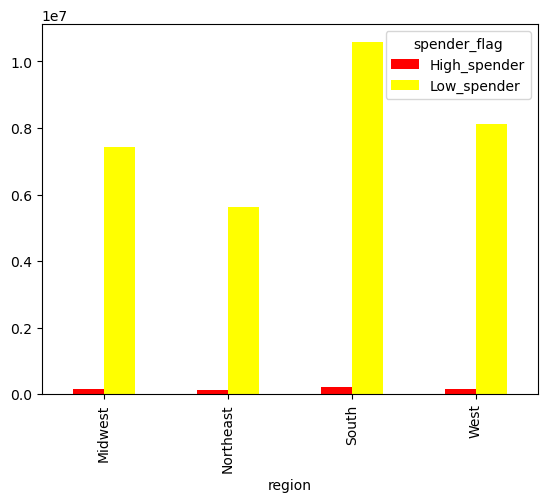

In [34]:
# For the non tech members, creating a bar chart:
bar_region_spender=region_spender_crosstab.plot.bar(color=['red','yellow'])

In [45]:
# Exporting Bar Chart
bar_region_spender.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','region_spending_bar.png'))

### Q04.Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [36]:
# Creating Exclusion Flag Column for High-Activity Customers
ords_prods_cust_merge.loc[ords_prods_cust_merge['max_order']>=5,'customer_activity_flag']='High Activity'

In [38]:
# Creating Exclusion Flag Column for Low-Activity Customers
ords_prods_cust_merge.loc[ords_prods_cust_merge['max_order']<5,'customer_activity_flag']='Low Activity'

In [40]:
# Checking frequency variables of new customer activity flag column
ords_prods_cust_merge['customer_activity_flag'].value_counts(dropna=False)

customer_activity_flag
High Activity    30964564
Low Activity      1440295
Name: count, dtype: int64

In [42]:
# Creating Separate Dataframe for only High-Activity Customers
df_high_activity=ords_prods_cust_merge[ords_prods_cust_merge['customer_activity_flag']=='High Activity']

In [44]:
# Checking frequency of new df:
df_high_activity['customer_activity_flag'].value_counts(dropna=False)

customer_activity_flag
High Activity    30964564
Name: count, dtype: int64

##### The count matches the count in the old df.

In [46]:
# Exporting New Dataframe of only high activity customers
df_high_activity.to_pickle(os.path.join(path,'02 Data','Prepared Data','orders_products_customers_high_activity.pkl'))

### Checked the "Prepared data" folder and it has been successfully exported

### Q05.Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

### Q06. Visualizations are created while profiling

In [50]:
ords_prods_cust_merge.shape

(32404859, 35)

#### 5.1 Profiling Based on Age

In [53]:
ords_prods_cust_merge['age'].describe()

count   32404859.00
mean          49.47
std           18.49
min           18.00
25%           33.00
50%           49.00
75%           65.00
max           81.00
Name: age, dtype: float64

Since the maximum age is 81, we will create 81 bins when we make the histogram

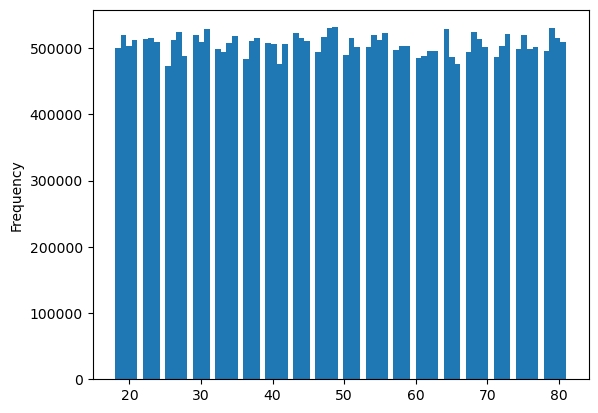

In [56]:
hist = ords_prods_cust_merge['age'].plot.hist(bins=81)

In [58]:
# Creating age groups:
ords_prods_cust_merge.loc[ords_prods_cust_merge['age']<=30,'age_group']='Young Adult'
ords_prods_cust_merge.loc[(ords_prods_cust_merge['age']>30)&(ords_prods_cust_merge['age']<=60),'age_group']='Middle-Age Adult'
ords_prods_cust_merge.loc[ords_prods_cust_merge['age']>60,'age_group']='Senior'

In [60]:
#Checking the counts:
ords_prods_cust_merge['age_group'].value_counts(dropna=False)

age_group
Middle-Age Adult    15222661
Senior              10582839
Young Adult          6599359
Name: count, dtype: int64

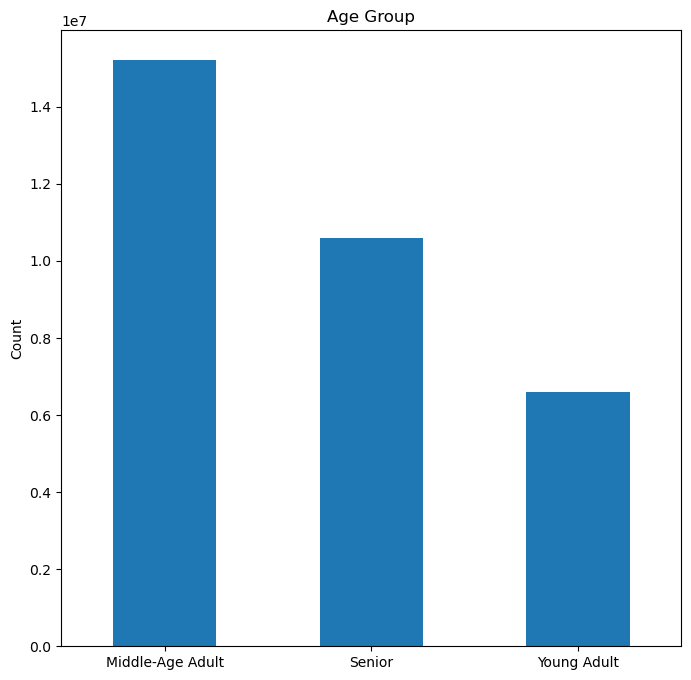

In [62]:
# Creating Bar Chart of Age Groups
age_group_counts = ords_prods_cust_merge['age_group'].value_counts()
plt.figure(figsize=(8,8))
age_group_bar=age_group_counts.plot.bar(rot=0)
plt.title('Age Group')
plt.xlabel('')
plt.ylabel('Count')
plt.tight_layout
plt.show()


### Checked Chatgpt for the error message
The error message "'Axes' object is not callable" typically occurs when you're trying to call an Axes object like a function. This can happen in the context of plotting with Matplotlib. To resolve this, ensure that you are using the correct syntax and method calls for Matplotlib. It was run in a previous script which I had to delete due to memory error.

In [65]:
# Exporting Age Group Bar Chart
age_group_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','age_group_distribution_bar_chart.png'))

#### 5.2 Profiling based on income

In [67]:
# Categorize customers into income categories: low, middle, & high income groups based on standard considerations of US incomes.
ords_prods_cust_merge.loc[ords_prods_cust_merge['income'] <= 50000, 'income_group'] = 'Low'
ords_prods_cust_merge.loc[(ords_prods_cust_merge['income'] > 50000) & (ords_prods_cust_merge['income'] <= 100000), 'income_group'] = 'Middle'
ords_prods_cust_merge.loc[ords_prods_cust_merge['income'] > 100000, 'income_group'] = 'High'

In [69]:
# Check frequency of income_group 
ords_prods_cust_merge['income_group'].value_counts(dropna = False)

income_group
High      14814202
Middle    13996574
Low        3594083
Name: count, dtype: int64

In [91]:
# Creating Crosstab Bewtween income_group and region
income_region_comparison=pd.crosstab(ords_prods_cust_merge['income_group'],ords_prods_cust_merge['region'],dropna=False)

<Figure size 1000x700 with 0 Axes>

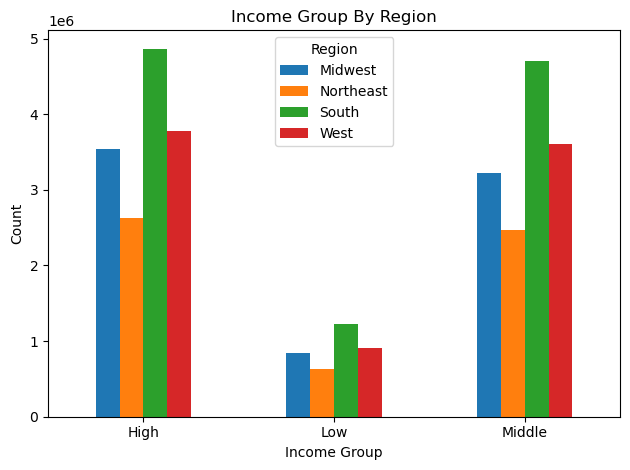

In [93]:
# Creating Bar Chart for Income Group By Region Comparison
plt.figure(figsize=(10, 7))
income_region_comparison_bar = income_region_comparison.plot(kind='bar',rot=0)
plt.title('Income Group By Region')
plt.xlabel('Income Group')
plt.ylabel('Count')
plt.legend(title='Region')
plt.tight_layout()
plt.show()

In [95]:
# Exporting Income Region Comparison Bar Chart
income_region_comparison_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','income_region_comparison_bar.png'))

### 5.3 will be done once all other questions have been answered as it runs into a memory error

### 5.4 Number of dependants

In [99]:
# Divide data into customers with dependents and customers without dependents
ords_prods_cust_merge.loc[ords_prods_cust_merge['n_dependants'] == 0, 'dependants_flag'] = 'No Dependants'
ords_prods_cust_merge.loc[ords_prods_cust_merge['n_dependants'] > 0, 'dependants_flag'] = 'Has Dependants'

In [101]:
#Check data
ords_prods_cust_merge['dependants_flag'].value_counts(dropna = False)

dependants_flag
Has Dependants    24307356
No Dependants      8097503
Name: count, dtype: int64

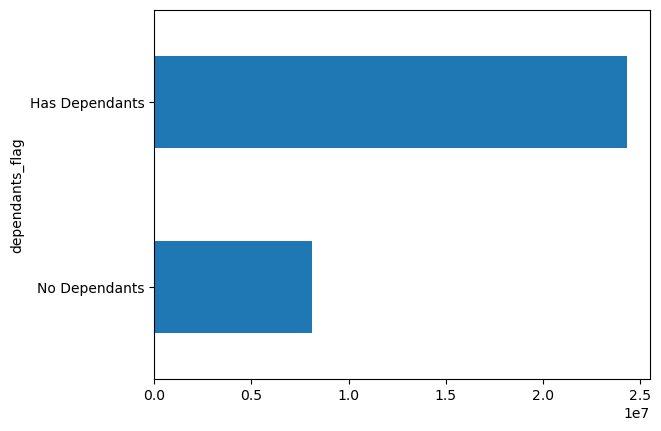

In [103]:
# Number of dependent group profile visualization horizontal

bar_dependants = ords_prods_cust_merge['dependants_flag'].value_counts().sort_values().plot.barh()

In [105]:
# Export Bar Chart

bar_dependants.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_dependants_group.png'))

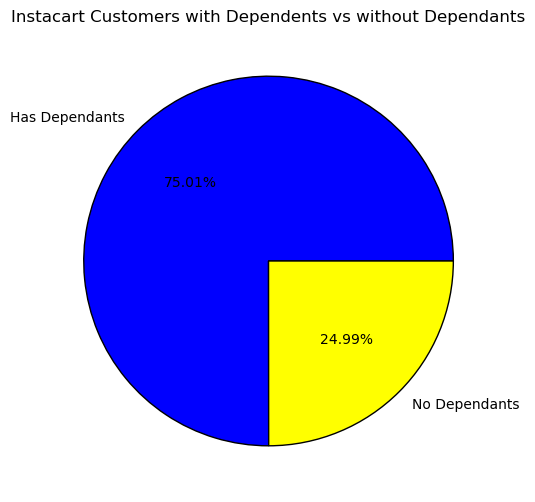

In [107]:
#Creating pie chart for the dependant groups:

dependants_flag_counts = ords_prods_cust_merge['dependants_flag'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(dependants_flag_counts, 
        labels = dependants_flag_counts.index, 
        autopct='%.2f%%', 
        colors = ['blue', 'yellow'],
        wedgeprops = {'edgecolor' : 'black'})
plt.title('Instacart Customers with Dependents vs without Dependants')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'customers_dependants_pie.png'), bbox_inches = 'tight')
plt.show()

#### Checked visualizations folder to see if image was saved.

#### Orders_days_of_week bar chart was created in the previous exercise

## Profiles with Departments

In [119]:
# Importing department wrangled dataframe
df_dept=pd.read_csv(os.path.join(path,'02 Data','Prepared Data','departments_wrangled.csv'))

In [121]:
df_dept

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [123]:
# Renaming unnamed column
df_dept.rename(columns={'Unnamed: 0':'department_id'},inplace=True)

In [125]:
# Checking the new df:
df_dept

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [127]:
df_dept.dtypes

department_id     int64
department       object
dtype: object

In [129]:
# Changing department_id from int64 to int8 to match with the ords_prods_cust for merge
df_dept['department_id']=df_dept['department_id'].astype('int8')

In [131]:
# Dropping original merge column to merge department later
ords_prods_cust_merge=ords_prods_cust_merge.drop(columns=['_merge'])

## Need to Create a new script to try again
Export the latest files

In [140]:
df_dept.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'dept_new.pkl'))

In [142]:
ords_prods_cust_merge.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'ords_prods_cust_merge.pkl'))

## Closing script and running a new one